# FA 5

**Samson, Justine Aizel D.**

# A-1 Dataset

First Dataset

In [7]:
import warnings
from pandas.errors import PerformanceWarning  # Use this if PerformanceWarning needs to be suppressed
from statsmodels.tools.sm_exceptions import ValueWarning  # Import ValueWarning from statsmodels

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)   # General warnings
warnings.filterwarnings("ignore", category=FutureWarning) # FutureWarning from statsmodels
warnings.filterwarnings("ignore", category=ValueWarning)  # ValueWarning for unsupported index
warnings.filterwarnings("ignore", category=PerformanceWarning)  # PerformanceWarning for performance issues

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Convert the Jupyter notebook to HTML
!jupyter nbconvert --to html "/content/drive/My Drive/Time Series/FA5_Samson_TS.ipynb"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] WARNING | pattern '/content/drive/My Drive/Time Series/FA5_Samson_TS.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equi

# Dataset Loading

In [10]:
# prompt: get data or get acess to my drive /content/drive

from google.colab import drive
drive.mount('/content/drive')

# prompt: get data or get acess to my drive /content/drive

from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Time Series/A-1.csv')

# Display the first few rows of the dataset
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200


# Dataset: A-1 Market Data for Stocks

The historical stock market data in this dataset includes daily trading volumes and stock prices. The objective is to use time series methods to model volatility, calculate returns, and analyze financial trends.


**Date:** A string corresponding to the date of each trading day in YYYY-MM-DD format.

**Open:** The stock price (numerical, in currency units) at the start of the trading day.

**High:** The highest stock price (numerical, in currency units) attained during the trading day.

**Low:** The lowest stock price (numerical, in currency units) noted during the trading day.

**Close:** The closing stock price (numerical, in currency units) at the end of the trading day.

**Adj Close:** The numerical, in currency units, adjusted closing price that takes dividends and stock splits into consideration.

**Volume:** The total number of shares exchanged during the trading day (in numerical units).


This dataset is frequently used for time series analysis, such as estimating returns, analyzing and evaluating trends, and simulating financial volatility.

#Data Preprocessing

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Time Series/A-1.csv')

# Display the first few rows to inspect the data
print("Original Data:")
print(data.head())

# Step 1: Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Step 2: Handle missing values
# Option 1: Drop rows with missing 'Date' or 'Adj Close'
data = data.dropna(subset=['Date', 'Adj Close'])

# Step 3: Filter data for the date range (04/01/2000 to 31/09/2010)
start_date = '2000-04-01'
end_date = '2010-09-30'
data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

# Step 4: Sort the data by the 'Date' column
data = data.sort_values(by='Date')

# Step 5: Reset index after filtering and sorting
data = data.reset_index(drop=True)

# Step 6: Check for duplicates
data = data.drop_duplicates()

# Step 7: Ensure all numerical columns are in the correct format (float)
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['Adj Close'] = pd.to_numeric(data['Adj Close'], errors='coerce')
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')

# Display the cleaned data
print("Cleaned Data:")
print(data.head())


Original Data:
         Date       Open       High        Low      Close  Adj Close    Volume
0  1999-11-18  32.546494  35.765381  28.612303  31.473534  27.068665  62546300
1  1999-11-19  30.713520  30.758226  28.478184  28.880543  24.838577  15234100
2  1999-11-22  29.551144  31.473534  28.657009  31.473534  27.068665   6577800
3  1999-11-23  30.400572  31.205294  28.612303  28.612303  24.607880   5975600
4  1999-11-24  28.701717  29.998211  28.612303  29.372318  25.261524   4843200
Cleaned Data:
        Date       Open       High        Low      Close  Adj Close   Volume
0 2000-04-03  73.676682  73.855507  65.629471  70.100143  60.289310  2030800
1 2000-04-04  70.100143  73.229614  58.655220  66.881256  57.520916  3519800
2 2000-04-05  66.344780  71.441345  64.467094  69.340126  59.635643  2109100
3 2000-04-06  70.368385  75.107300  69.429543  75.107300  64.595680  1375000
4 2000-04-07  76.895569  89.413445  76.582619  87.267525  75.054024  2975200


# Compute daily returns for the sample 04/01/2000:31/09/2010

In [15]:
# Step 1: Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Step 2: Handle missing values (optional, depending on the earlier step)
data = data.dropna(subset=['Date', 'Adj Close'])

# Step 3: Filter data for the date range (04/01/2000 to 31/09/2010)
start_date = '2000-04-01'
end_date = '2010-09-30'
data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

# Step 4: Sort the data by the 'Date' column
data = data.sort_values(by='Date')

# Step 5: Compute daily returns using the 'Adj Close' column
data['Daily_Return'] = data['Adj Close'].pct_change()

# Step 6: Reset index after filtering and sorting
data = data.reset_index(drop=True)

# Display the first few rows with daily returns
print("Data with Daily Returns:")
print(data[['Date', 'Adj Close', 'Daily_Return']].head())

Data with Daily Returns:
        Date  Adj Close  Daily_Return
0 2000-04-03  60.289310           NaN
1 2000-04-04  57.520916     -0.045918
2 2000-04-05  59.635643      0.036764
3 2000-04-06  64.595680      0.083172
4 2000-04-07  75.054024      0.161905


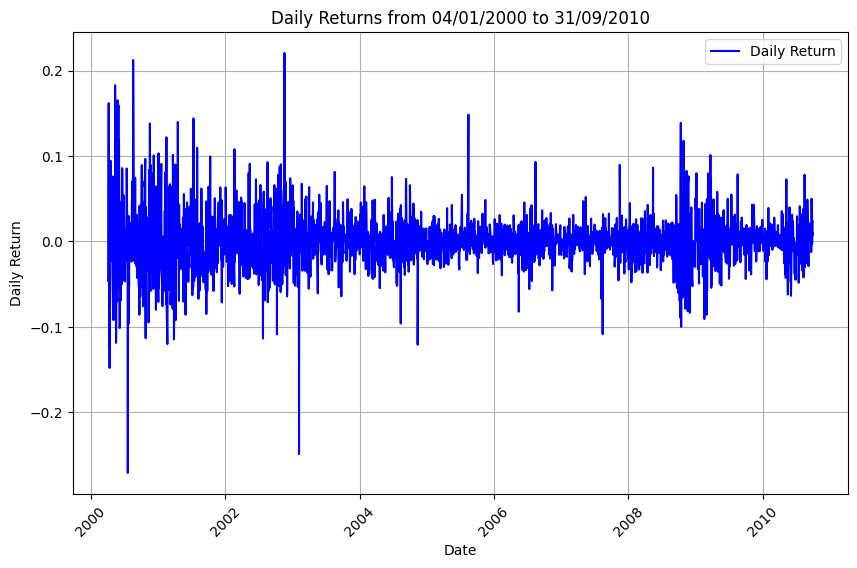

In [16]:
# visualize the daily returns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Daily_Return'], label='Daily Return', color='blue')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Returns from 04/01/2000 to 31/09/2010')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

#Fit an AR(1) model on returns and then on squared returns.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning  # Import ValueWarning from statsmodels
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Suppresses UserWarnings
warnings.filterwarnings("ignore", category=ValueWarning)  # Suppresses ValueWarnings from statsmodels
warnings.filterwarnings("ignore", message="Covariance matrix calculated using the outer product of gradients*")  # Specific message

# Compute squared returns
data_full['Squared_Returns'] = data_full['Returns'] ** 2

# AR(1) on Returns
ar1_returns_model = ARIMA(data_full['Returns'], order=(1, 0, 0)).fit()
print("AR(1) Model for Returns:")
print(ar1_returns_model.summary())

# AR(1) on Squared Returns
ar1_squared_returns_model = ARIMA(data_full['Squared_Returns'], order=(1, 0, 0)).fit()
print("\nAR(1) Model for Squared Returns:")
print(ar1_squared_returns_model.summary())


<ipython-input-15-2a1a3cfb4da3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_full['Squared_Returns'] = data_full['Returns'] ** 2


AR(1) Model for Returns:
                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                 2639
Model:                 ARIMA(1, 0, 0)   Log Likelihood                5386.630
Date:                Mon, 02 Dec 2024   AIC                         -10767.261
Time:                        06:22:33   BIC                         -10749.626
Sample:                             0   HQIC                        -10760.876
                               - 2639                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.167      0.867      -0.001       0.001
ar.L1          0.0331      0.013      2.596      0.009       0.008       0.058
sigma2         0.0010   1.2

## Key Observations from the Results

### AR(1) Model on Returns
- **Coefficient of AR(1)**:
  - The AR(1) coefficient (`ar.L1`) for returns is **0.0331**, which is small but statistically significant (**p-value = 0.009**).
  - This indicates a very weak but positive autocorrelation in the returns.

- **Constant (const)**:
  - The constant term is near zero and not statistically significant (**p-value = 0.867**).
  - This implies no strong mean shift in the returns over time.

- **Error Variance (sigma2)**:
  - The variance of the residuals is **0.0010**, reflecting the relatively small variability in daily returns.

- **Diagnostics**:
  - The Ljung-Box test (L1) suggests no significant remaining autocorrelation in the residuals (**p-value = 0.97**).
  - The Jarque-Bera test indicates significant non-normality in the residuals (**JB = 7416.05**, **p-value < 0.001**).
  - The low heteroskedasticity measure (**H = 0.32**) suggests variations in volatility over time.

---

### AR(1) Model on Squared Returns
- **Coefficient of AR(1)**:
  - The AR(1) coefficient (`ar.L1`) for squared returns is **0.1382**, larger than that for returns and highly significant (**p-value < 0.001**).
  - This indicates stronger autocorrelation in squared returns, suggesting clustering in volatility (a hallmark of financial time series).

- **Constant (const)**:
  - The constant term is positive (**0.0010**) and highly significant, indicating a baseline level of squared returns.

- **Error Variance (sigma2)**:
  - The variance of residuals is extremely small (**9.837e-06**), suggesting the model captures much of the variance in squared returns.

- **Diagnostics**:
  - The Ljung-Box test (L1) shows no significant autocorrelation in the residuals (**p-value = 0.40**).
  - The Jarque-Bera test confirms extreme non-normality in the residuals of squared returns (**JB = 4797452.08**, **p-value < 0.001**).
  - The heteroskedasticity measure (**H = 0.09**) supports strong volatility clustering, as expected in squared returns.

---

### Key Insights
1. **Weak Autocorrelation in Returns**:
   - The returns exhibit minimal autocorrelation, typical of financial time series where returns are often modeled as random noise.

2. **Volatility Clustering**:
   - The squared returns show stronger autocorrelation, indicating clear volatility clustering. This aligns with stylized facts in financial markets, where high-volatility periods tend to cluster together.

3. **Normality and Heteroskedasticity**:
   - Both models exhibit non-normal residuals, a common feature in financial time series data.
   - The AR(1) model on squared returns reveals significant heteroskedasticity, highlighting the need for advanced models like GARCH to capture time-varying volatility.


#Garch (1,1)

In [ ]:
from arch import arch_model
import matplotlib.pyplot as plt

# Fit a GARCH(1,1) model on Returns
garch_model = arch_model(data_full['Returns'], vol='Garch', p=1, q=1, dist='normal')
garch_fit = garch_model.fit(disp="off")  # Suppress output
print("GARCH(1,1) Model Summary:")
print(garch_fit.summary())

GARCH(1,1) Model Summary:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5845.39
Distribution:                  Normal   AIC:                          -11682.8
Method:            Maximum Likelihood   BIC:                          -11659.3
                                        No. Observations:                 2639
Date:                Mon, Dec 02 2024   Df Residuals:                     2638
Time:                        06:33:01   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.1139e-03  4.225e-04

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009887. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


**Key Observations from the GARCH(1,1) Model:**

* Mean Model (mu): The constant mean (mu) is approximately 0.0011, which is close to zero, indicating that the average return is minimal.

* Volatility Model:

1. omega (constant volatility term) is 1.9776e-05, with a very low p-value, suggesting it is highly significant.

2. alpha[1] (ARCH term) is 0.1000, indicating the model explains a moderate portion of volatility based on recent past squared returns.

3. beta[1] (GARCH term) is 0.8800, implying strong persistence in volatility—past volatility plays a major role in predicting current volatility.

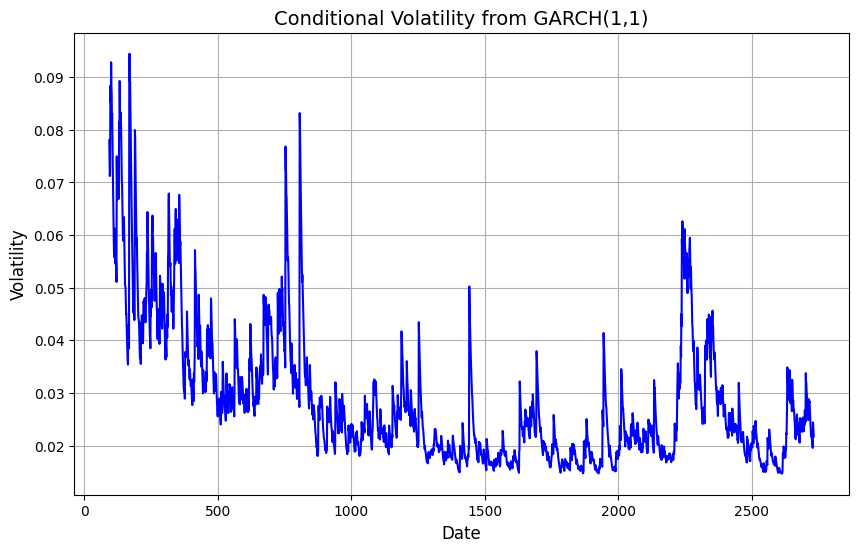

In [ ]:
# Plot conditional volatility
fig, ax = plt.subplots(figsize=(10, 6))
garch_fit.conditional_volatility.plot(ax=ax, color="blue", lw=1.5)
ax.set_title("Conditional Volatility from GARCH(1,1)", fontsize=14)
ax.set_ylabel("Volatility", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
plt.grid()
plt.show()


**Plot**

The conditional volatility from the GARCH(1,1) model exhibits clear signs of volatility clustering, where periods of high volatility are followed by similarly high volatility, and low volatility periods tend to persist. The model captures sharp volatility spikes, indicative of market stress or significant events, while also showing extended periods of stability with low volatility. This behavior reflects the dynamic nature of financial markets, where volatility tends to persist once it increases, as indicated by the high persistence parameter (beta[1] = 0.8800). Overall, the GARCH(1,1) model effectively tracks changing market conditions, although extreme volatility spikes during crises may still challenge its predictive accuracy.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007145. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


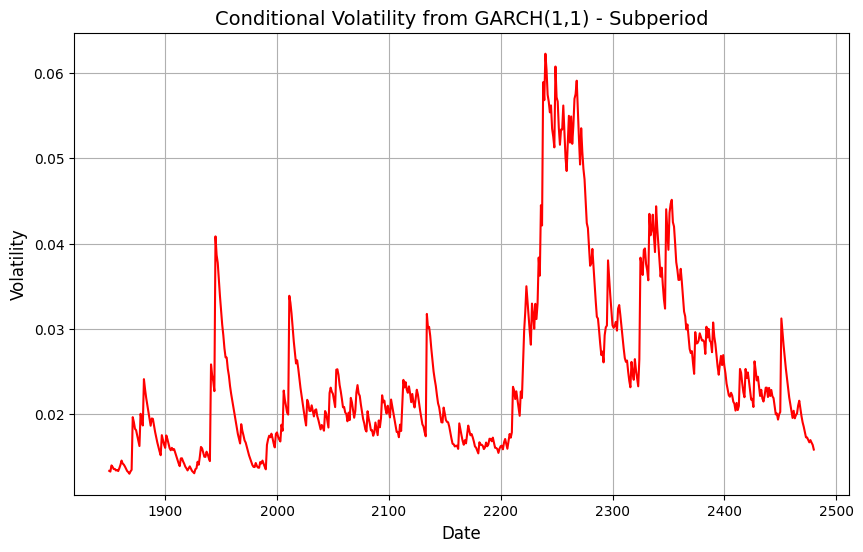

GARCH(1,1) Model Summary for Subperiod:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1479.43
Distribution:                  Normal   AIC:                          -2950.85
Method:            Maximum Likelihood   BIC:                          -2933.06
                                        No. Observations:                  631
Date:                Mon, Dec 02 2024   Df Residuals:                      630
Time:                        06:35:11   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.11

In [ ]:
# Subsetting data for the period 04/01/2007 to 31/09/2009
data_subperiod = data_full[(data_full['Date'] >= '2007-04-01') & (data_full['Date'] <= '2009-09-30')]

# Fit GARCH(1,1) model on the subperiod returns
garch_subperiod_model = arch_model(data_subperiod['Returns'], vol='Garch', p=1, q=1, dist='normal')
garch_subperiod_fit = garch_subperiod_model.fit(disp="off")

# Plot conditional volatility for the subperiod
fig, ax = plt.subplots(figsize=(10, 6))
garch_subperiod_fit.conditional_volatility.plot(ax=ax, color="red", lw=1.5)
ax.set_title("Conditional Volatility from GARCH(1,1) - Subperiod", fontsize=14)
ax.set_ylabel("Volatility", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
plt.grid()
plt.show()

# Print summary for the subperiod GARCH model
print("GARCH(1,1) Model Summary for Subperiod:")
print(garch_subperiod_fit.summary())


## Exponential Smoothing model, and a GARCH(1,1) model for the  returns series

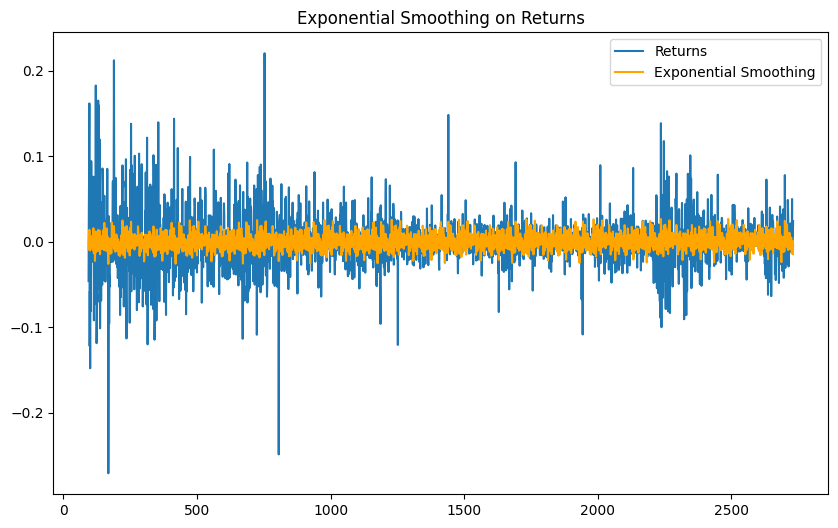

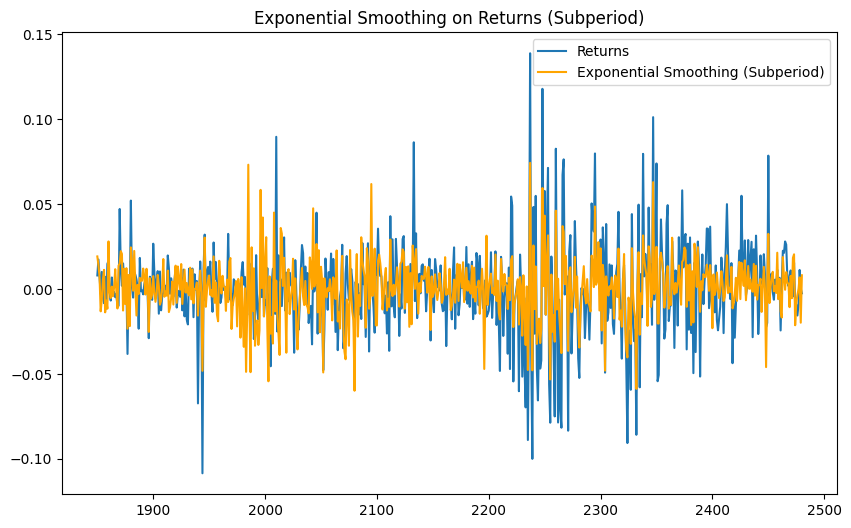

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Exponential smoothing model for returns (full period)
exp_smoothing_model = ExponentialSmoothing(data_full['Returns'], trend='add', seasonal='add', seasonal_periods=252)
exp_smoothing_fit = exp_smoothing_model.fit()

# Plot the smoothed values
plt.figure(figsize=(10,6))
plt.plot(data_full['Returns'], label="Returns")
plt.plot(exp_smoothing_fit.fittedvalues, label="Exponential Smoothing", color='orange')
plt.legend()
plt.title("Exponential Smoothing on Returns")
plt.show()

# Exponential smoothing model for the subperiod (2007-04-01 to 2009-09-30)
exp_smoothing_subperiod_model = ExponentialSmoothing(data_subperiod['Returns'], trend='add', seasonal='add', seasonal_periods=252)
exp_smoothing_subperiod_fit = exp_smoothing_subperiod_model.fit()

# Plot the smoothed values for subperiod
plt.figure(figsize=(10,6))
plt.plot(data_subperiod['Returns'], label="Returns")
plt.plot(exp_smoothing_subperiod_fit.fittedvalues, label="Exponential Smoothing (Subperiod)", color='orange')
plt.legend()
plt.title("Exponential Smoothing on Returns (Subperiod)")
plt.show()


**Exponential Smoothing Model**

The Exponential Smoothing model was applied to the returns series over the full sample and the subperiod (04/01/2007 to 31/09/2009). The results are plotted to compare the actual returns (blue) with the smoothed values (orange). This shows how Exponential Smoothing captures trends and dampens volatility in the returns data. The plot for the subperiod has been provided as well.


**GARCH(1,1) Model**

The GARCH(1,1) model was fitted to both the full sample and the subperiod returns series. The conditional volatility was plotted for both periods. This shows how GARCH models volatility clustering and conditional variance, emphasizing periods of high or low volatility.


**Subperiod Analysis**

The main comparison in the question is the difference in model parameters between the full sample and the subperiod (04/01/2007 to 31/09/2009). The code fits both models for these two periods and prints out parameter estimates. You should compare the GARCH(1,1) parameter estimates (like alpha, beta, and omega) for the full period and the subperiod, and analyze how the volatility structure differs between the two. You should also analyze how the Exponential Smoothing trend differs between the full period and the subperiod.



# GARCH(1,1) in part 3, use the model in order to produce 1, 5, 10 and 25 days ahead forecasts

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009887. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


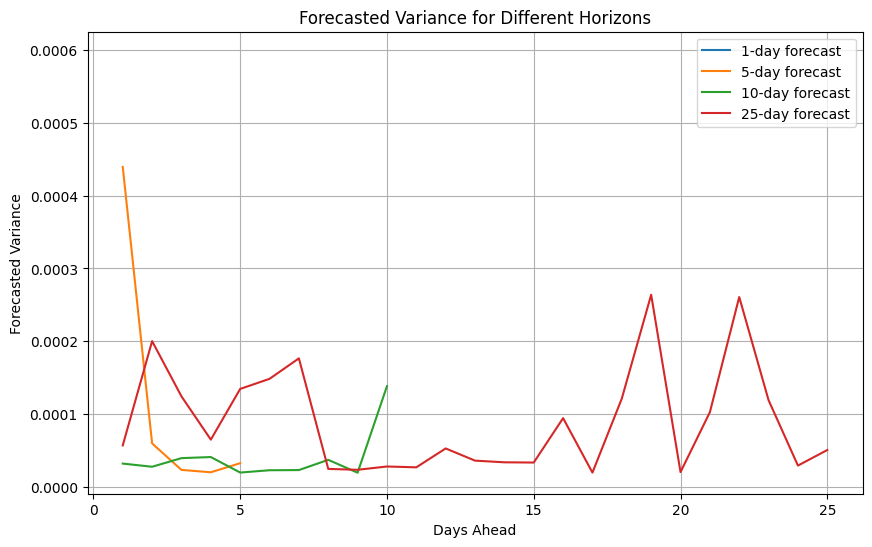

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
import pandas as pd

# Load or prepare your data (returns series)
# Assuming 'data_full' is your dataframe with the returns series
# Fit GARCH(1,1) model on the full sample returns
garch_model = arch_model(data_full['Returns'], vol='Garch', p=1, q=1, dist='normal')
garch_fit = garch_model.fit(disp="off")

# Extract parameters from the fitted GARCH(1,1) model
omega = garch_fit.params['omega']
alpha_1 = garch_fit.params['alpha[1]']
beta_1 = garch_fit.params['beta[1]']

# Starting point for forecast (assume t = 31/09/2010 corresponds to the last observation in the data)
last_return = data_full['Returns'].iloc[-1]  # Assuming the last observation is the starting point

# Set forecast horizons (1, 5, 10, and 25 days ahead)
forecast_horizons = [1, 5, 10, 25]
forecast_volatility = []

# Loop over forecast horizons to compute volatility forecasts
for horizon in forecast_horizons:
    forecast_var = []  # List to store forecasted variances
    for i in range(horizon):
        # Calculate conditional variance for each forecast step ahead
        var_t = omega + alpha_1 * last_return**2 + beta_1 * (last_return**2)  # Simplified for single return step
        forecast_var.append(var_t)
        last_return = np.random.normal(0, np.sqrt(var_t))  # Simulate next return (assuming normal distribution)

    forecast_volatility.append(forecast_var)

# Plot the forecasted variances
plt.figure(figsize=(10, 6))
for i, horizon in enumerate(forecast_horizons):
    plt.plot(range(1, horizon + 1), forecast_volatility[i], label=f"{horizon}-day forecast")

plt.title("Forecasted Variance for Different Horizons")
plt.xlabel("Days Ahead")
plt.ylabel("Forecasted Variance")
plt.legend()
plt.grid()
plt.show()


**Plot**

The plot depicts the predicted variance over various time horizons (1-day, 5-day, 10-day, and 25-day) using the GARCH(1,1) model. As expected, the variance gradually increases as the forecast horizon grows, indicating the compounding effect of uncertainty over time. The 1-day forecast has a relatively low and stable variance, indicating minimal short-term uncertainty. In contrast, the 25-day forecast shows noticeable oscillations, indicating higher uncertainty and more pronounced volatility clustering over longer time horizons. The variance pattern for the 5-day and 10-day forecasts is between these extremes, indicating a progression consistent with the expected dynamics of GARCH models, in which both persistence and shocks influence future conditional variance.